# Dog breed identification competition

To do:
* Create train and validation set

* Train VGG16 model and validate
    * Finetune to dog breed dataset
    * Figure out what additional pre-processing steps can be done to improve accuracy
    
* Test on test set 

* submit

In [49]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots
from vgg16 import Vgg16
import pandas as pd
from jupyterthemes import jtplot
jtplot.reset()
jtplot.style(theme='oceans16',context='talk', fscale=1.4, spines=False, gridlines='--')



In [74]:
main_dir = '/home/ubuntu/nbs/courses/deeplearning1/nbs/Dog_breed_identification/'

In [25]:
train_labels = pd.read_csv('labels.csv')
train_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [155]:
range(0,len(num_breed),20)

[0, 20, 40, 60, 80, 100]

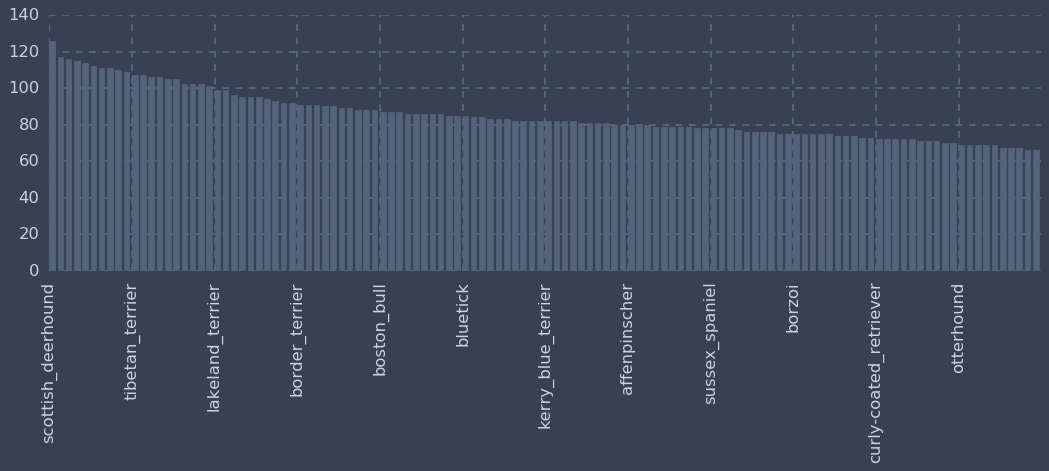

In [157]:
plt.close('all')
fig = plt.figure(figsize = (16,4))
num_breed = train_labels['breed'].value_counts()
ax = fig.add_subplot(111)
ax.bar(np.arange(0,len(num_breed),1), num_breed)
xlabels_pos = range(0,len(num_breed),10)
xlabels = np.array(list(num_breed.keys()))[xlabels_pos]
ax.set_xticks(xlabels_pos)
ax.set_xticklabels(xlabels, rotation = 'vertical')
fig

### Create validation set

In [4]:
# %mkdir valid

mkdir: cannot create directory ‘valid’: File exists


In [148]:
breed_probs = num_breed/train_labels.shape[0]
train_labels['sample_prob'] = 0
train_labels

for x in breed_probs.index:
    indv_prob = breed_probs[x]/num_breed[x]
    train_labels.loc[train_labels['breed'] == x, 'sample_prob'] = indv_prob

valid_set_fns = np.random.choice(train_labels['id'], int(len(train_labels['id'])*.3),
                                   replace = False, p = train_labels['sample_prob'])

[os.rename(main_dir+'/train/'+x+'.jpg', main_dir+'/valid/'+x+'.jpg')
 for x in valid_set_fns];


Object `np.isin` not found.


In [175]:
xlabels_pos

(array([  4,  13,  27,  32,  33,  34,  47,  66,  71,  77, 101, 108]),)

In [172]:
os.chdir(main_dir+'valid')
moved_valid_files = glob('*jpg')
moved_valid_files = pd.DataFrame(moved_valid_files, columns = ['id']).applymap(lambda y: y[:-4])
valid_labels = moved_valid_files.merge(train_labels)

plt.close('all')
fig = plt.figure(figsize = (16,4))
num_breed_valid = valid_labels['breed'].value_counts()
ax = fig.add_subplot(111)
ax.bar(np.arange(0,len(num_breed_valid),1), num_breed_valid)
xlabels_pos = 
ax.set_xticks(xlabels_pos)
ax.set_xticklabels(xlabels, rotation = 'vertical')
# fig

In [27]:
os.chdir(main_dir+'/train/')
all_train = glob('*jpg')
breed_probs = num_breed/labels.shape[0]
valid_set_fns = np.random.choice(all_train, int(len(all_train)*.3), replace = False)
[os.rename(main_dir+'/train/'+x, main_dir+'/valid/'+x) for x in valid_set_fns];

In [147]:
os.chdir(main_dir+'/valid/')
all_train = glob('*jpg')
[os.rename(main_dir+'/valid/'+x, main_dir+'/train/'+x) for x in all_train];

### Initialize Vgg16 model and batches generator

In [ ]:
vgg = Vgg16()

In [20]:
batch_size = 64
num_epochs = 3
batches = vgg.get_batches(main_dir + '/train', batch_size = batch_size)
val_batches = vgg.get_batches(main_dir + '/valid', batch_size = batch_size*2)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


### Train model and save weights

In [17]:
for i in range(3):
    vgg.fit(batches,val_batches,nb_epoch = 1)
    latest_weights_filename = 'ft'+str(i)
    vgg.model.save_weights(main_dir+'/'+latest_weights_filename)

NameError: name 'val_batches' is not defined

In [15]:
??vgg.fit

In [14]:
??vgg